# MNIST

The MNIST database is a collection of handwritten images which are used to train a neural network to recognize digits from a paper. MNIST also provides a database for testing the neural network.

The training imeages file contains 60000 images and the test images file contains 10000 images. These files are in a special format therefore they have to be read byte by byte. 


# Read the training image file
The file has to be read as big endian. The first four bite is the magic number which identifies the fyle type.
The data in this file is a 3 dimensional array:
* Bytes 4 to 8 is the number of pictures in the datatset (The size of the outer array)
* Bytes 8 to 12 is the number of rows (Size of the middle array) 
* Bytes 12 to 16 is the number of collumns (Size of the last array)
* From byte 16 until the end of the file are the pizels of the picures.

### Open the file

There is two ways are provided to aquire the file and its content:

#### Open a local file with gzip
This cell is commented out and here for presentation purposes. The file should be loaded only one way.

In [1]:
#https://docs.python.org/3/library/gzip.html

#import gzip

#Unzip the training images

#with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    
#    file_content = f.read()
    
#print('File read in')

#### Open a url to download the file and open the downloaded gzip file

In [2]:
#https://stackoverflow.com/questions/2695152/in-python-how-do-i-decode-gzip-encoding
#It is a modified version of Michal Niklas's answer
import gzip
import io
from urllib.request import urlopen
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    file_content = f.read()
print('File read in')

File read in


### Do byte confirmation and read the first 16 bytes

In [3]:
#Confirm if the first four byteis 2051
is_it_the_right_bytes=int.from_bytes(file_content[0:4], byteorder='big')==2051
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [4]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
pictures_number=int.from_bytes(file_content[4:8], byteorder='big')
print('Number of pictures: %d' % pictures_number)

Number of pictures: 60000


In [5]:
#Number of rows should be from 8 to 12
rows_number=int.from_bytes(file_content[8:12], byteorder='big')
print ('Number of rows: %d' % rows_number)

Number of rows: 28


In [6]:
#Number of columns should be from 12 to 16
columns_number=int.from_bytes(file_content[12:16], byteorder='big')
print ('Number of columns: %d' % columns_number)

Number of columns: 28


The pixels are from byte 16 until the end of the file. Each 784 batch is a picture(28*28)


### Read the data into an array

The esiest way to read the bytes is to do a while loop. The loop has to start from position 16 as until this position the bytes are set for metadata purpose. 

The while loop should run until the last byte is consumed, therefore it runs until the size of the ```file_content``` byte array.

The iteration step is the size of the number of columns in a picture array: 28.

Slices of bytes are taken and converted to int at each iteration from ```file_content```. This converted array is added to a row and the row counter is updated. 

Once a the row counter exceeds the size of pixel rows of each pixel it is reset to the first row and the picture counter is increased by one.

In [20]:
#Import numpy for creating the base array
import numpy as np;
#Function taking the file content,number of pictures, number of columns, number of rows and the starting offset
#It converst the file content byte by byte into an int and collects it into a 3D array and returns the array
def load_pictures_to_array(file_content,pictures_number,columns_number,rows_number,offset):
    # Set up an array for picture storage
    pictures=np.zeros((pictures_number,rows_number,columns_number),dtype=int)
    #The current row a picture 1-28
    current_row=1
    #The current picture 1-59999
    current_image=0
    #The iteration index
    i=offset
    #Run a loop until the end of the byte array    
    while i<len(file_content):
        #Convert a row to int types
        a=np.frombuffer(file_content[i:i+columns_number],dtype=np.uint8)
        #Set the row the current picture
        pictures[current_image][current_row-1]=a
        #Go to next row
        current_row+=1
        #If the current row is the same as the size of the rows
        if(current_row>rows_number):
            #Set the row to number 1
            current_row=1
            #Go to the next picture
            current_image+=1
        #Increase the counter with the size of the columns    
        i+=columns_number
    return pictures

In [21]:
#Import time for the speed measurement
import time

#Print out the size of file_content
print('Original content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Read pictures into an array
training_pictures = load_pictures_to_array(file_content,pictures_number,columns_number,rows_number,16)

#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))


Original content length:47040016
Run for 2.28122615814209 seconds.


### Confirm data

To confirm the data was read in correctly, ```matplotlib``` can be used. This library can plot an array of pixels as a picture.

Three different item can be printed from three different position of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three pictures are numbers at the same position on the picture, that means the reading was succesful and there wasn't shifting in the rows or columns.

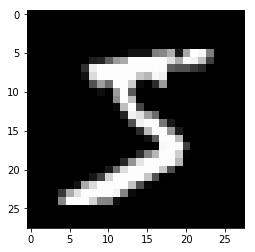

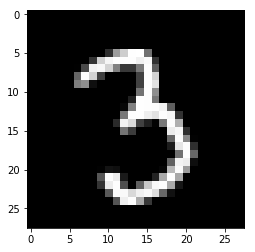

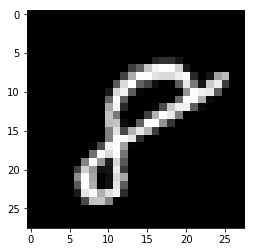

In [10]:
#Inlince complant for jupyter compatibility
%matplotlib inline 
#Import matplotlib 
from matplotlib import pyplot as plt
#Set pyplot to gray scale as the pixels are 0 to 255 on graye scale
plt.gray()
#Plot the first image
plt.imshow(training_pictures[0], interpolation='nearest')
plt.show()
#Plot the middle image
plt.imshow(training_pictures[30000], interpolation='nearest')
plt.show()
#Plot the last image
plt.imshow(training_pictures[59999], interpolation='nearest')
plt.show()

# Read the labels for the training images
The file has to be read as big endian. The first four bite is the magic number which identifies the fyle type.
The data in this file is an array:
* Bytes 5 to 8 is the number of labels in the datatset (The size of the outer array)
* From byte 9 until the end of the file each byte is a label.

### Open the file

In [63]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    file_content = f.read() 
print('File read in')

File read in


### Do byte confirmation and read the first 8 bytes

In [64]:
#Confirm if the first four byteis 2049
is_it_the_right_bytes=int.from_bytes(file_content[0:4], byteorder='big')==2049
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [16]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
label_number=int.from_bytes(file_content[4:8], byteorder='big')
print('Number of Labels: %d' % label_number)

Number of Labels: 60000


### Read the data into an array

The reading happens the same way as the reading of pictures. This time a simple int array is loaded in.

In [17]:
#Function taking the file content,number of labels, and the starting offset
#It converst the file content byte by byte into an int and collects it into an array and returns the array
def load_labels_to_array(file_content,label_number,offset=0):
    # Collect the files into an array.
    labels=np.frombuffer(file_content[offset:label_number+offset],dtype=np.uint8)
    return labels

In [18]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Convert label bytes to numbers and collect to an array
training_labels=load_labels_to_array(file_content,label_number,8)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))

Origonal content length:47040016
Run for 0.0 seconds.


### Confirm data

To confirm the data was read in correctly, the same indexes should be checked in the label array as in the training picture array:

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three numbers are the same numbers as the pictures presented above then the conversion was succesful.

In [19]:
print("Number of labels: %d" % len(training_labels))
print("Label at index 0: %d" % training_labels[0])
print("Label at index 30000: %d" % training_labels[30000])
print("Label at index 59999: %d" % training_labels[59999])

Number of labels: 60000
Label at index 0: 0
Label at index 30000: 0
Label at index 59999: 87


# Read the test image file
This file is the same format as the training image file.
The data in this file is a 3 dimensional array:
* Bytes 4 to 8 is the number of pictures in the datatset (The size of the outer array)
* Bytes 8 to 12 is the number of rows (Size of the middle array) 
* Bytes 12 to 16 is the number of collumns (Size of the last array)
* From byte 16 until the end of the file are the pizels of the picures.

### Open the file

#### Open a url to download the file and open the downloaded gzip file

In [50]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    file_content = f.read()
print('File read in')

File read in


### Do byte confirmation and read the first 16 bytes

In [51]:
#Confirm if the first four byteis 2051
is_it_the_right_bytes=int.from_bytes(file_content[0:4], byteorder='big')==2051
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [53]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
test_pictures_number=int.from_bytes(file_content[4:8], byteorder='big')
print('Number of pictures: %d' % test_pictures_number)

Number of pictures: 10000


In [54]:
#Number of rows should be from 8 to 12
test_rows_number=int.from_bytes(file_content[8:12], byteorder='big')
print ('Number of rows: %d' % test_rows_number)

Number of rows: 28


In [55]:
#Number of columns should be from 12 to 16
test_columns_number=int.from_bytes(file_content[12:16], byteorder='big')
print ('Number of columns: %d' % test_columns_number)

Number of columns: 28


The pixels are from byte 16 until the end of the file. Each 784 batch is a picture(28*28)


### Read the data into an array

The reading is done with the above defined function the exact same way as the reading of training images.

In [58]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Read pictures into an array
test_pictures = load_pictures_to_array(file_content,test_pictures_number,test_columns_number,test_rows_number,16)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))


Content length:7840016
Run for 0.8933169841766357 seconds.


### Confirm data

To confirm the data was read in correctly, ```matplotlib``` can be used the same way as above with the training data set. 

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 5000
* The last one at index 9999


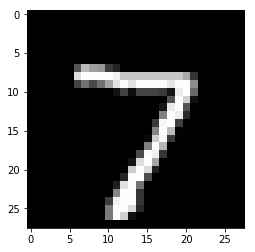

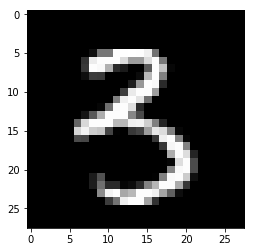

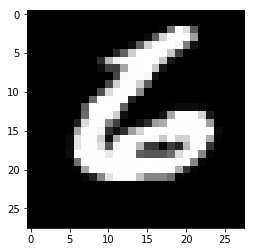

In [62]:
#Plot the first image
plt.imshow(test_pictures[0], interpolation='nearest')
plt.show()
#Plot the middle image
plt.imshow(test_pictures[5000], interpolation='nearest')
plt.show()
#Plot the last image
plt.imshow(test_pictures[9999], interpolation='nearest')
plt.show()

# Read the labels for the test images
This file is the same format as the training label file.
The data in this file is an array:
* Bytes 5 to 8 is the number of labels in the datatset (The size of the outer array)
* From byte 9 until the end of the file each byte is a label.

### Open the file

In [69]:
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    #Overides the previously used file_content
    file_content = f.read() 
print('File read in')

File read in


### Do byte confirmation and read the first 8 bytes

In [70]:
#Confirm if the first four byteis 2049
is_it_the_right_bytes=int.from_bytes(file_content[0:4], byteorder='big')==2049
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [71]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
label_number=int.from_bytes(file_content[4:8], byteorder='big')
print('Number of Labels: %d' % label_number)

Number of Labels: 10000


### Read the data into an array

The reading is done with the above defined function the exact same way as the reading of training labels.

In [79]:
#Print out the size of file_content
print('Origonal content length:'+str(len(file_content)))
#The starting time of the algorythm
start_time = time.time()
#Convert label bytes to numbers and collect to an array
test_labels=load_labels_to_array(file_content,label_number,8)
#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))

Origonal content length:10008
Run for 0.0 seconds.


### Confirm data

To confirm the data was read in correctly, the same indexes should be checked in the label array as in the training picture array:

Three different item can be printed from three different positions of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three numbers are the same numbers as the pictures presented above then the conversion was succesful.

In [80]:
print("Number of labels: %d" % len(test_labels))
print("Label at index 0: %d" % test_labels[0])
print("Label at index 30000: %d" % test_labels[5000])
print("Label at index 59999: %d" % test_labels[9999])

Number of labels: 10000
Label at index 0: 7
Label at index 30000: 3
Label at index 59999: 6


# Conclusion
The four files can be read in easily and efficiently with a single loop for each file.

Could be further optimized if the same loop is used for picture and label reading. That way two loops could be used for the four files. 

The first loop would run 60000*28*28 (47040000) times and the second loop would run 10000*28*28 (7840000) times. The conversion would be for each index individually with tracking the row and column numbers. At the same time the label could be read for every 748th index. Meaning the label conversion would not happen in every iteration just when a new image's last pixel is converted. 

This approach obviously would be more efficient, however I chose to separate the image and label reading as it is better demonstrated separate.